In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### import Data 
import pandas as pd
carh = pd.read_csv('/content/drive/MyDrive/uay cnn/car-hor.csv')
carv = pd.read_csv('/content/drive/MyDrive/uay cnn/car-ver.csv')
bike=pd.read_csv('/content/drive/MyDrive/uay cnn/Bike.csv')
human = pd.read_csv('/content/drive/MyDrive/uay cnn/Human.csv')


In [ ]:
carh.shape

(12923, 52)

In [ ]:
carv.shape

(14348, 52)

In [ ]:
bike.shape

(11429, 52)

In [ ]:
human.shape

(10917, 51)

In [ ]:
dat = pd.concat([carh, carv,bike])
dat = dat.drop(columns='File')

In [ ]:
dat = pd.concat([dat,human])

In [ ]:
## Remaining Peak array 35 elements
dat = dat.rename(columns = {'0' : "PA1", '1' : "PA2",  '2' : "PA3", '3': "PA4", '4' : "PA5", '5' : "PA6", '6' : "PA7", '7' : "PA8", '8' : "PA9", '9' : "PA10"})
dat = dat.rename(columns = {'10':"PA11", '11': "PA12", '12': "PA13", '13': "PA14", '14': "PA15", '15': "PA16", '16': "PA17", '17': "PA18", '18': "PA19", '19': "PA20"})
dat = dat.rename(columns ={'20': "PA21", '21': "PA22", '22': "PA23", '23': "PA24", '24': "PA25", '25': "PA26", '26': "PA27", '27': "PA28", '28': "PA29", '29': "PA30", '30': "PA31", '31': "PA32", '32': "PA33", '33': "PA34", '34':"PA35"})   

In [ ]:
## check no.of classes 
classes = len(dat.ObjType.unique())
print(classes)

4


In [ ]:
dat

,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PA8,PA9,PA10,PA11,PA12,PA13,PA14,PA15,PA16,PA17,PA18,PA19,PA20,PA21,PA22,PA23,PA24,PA25,PA26,PA27,PA28,PA29,PA30,PA31,PA32,PA33,PA34,PA35,Range,dpplIdx,rangeIdx,pkArray,Coordinates.X,Coordinates.Y,pkValue1.Real,pkValue1.Imaginary,pkValue2.Real,pkValue2.Imaginary,pkValue3.Real,pkValue3.Imaginary,pkValue4.Real,pkValue4.Imaginary,ObjType,Frame
0,0.000000,0.000000,2521.468750,1290.304200,14.212670,0.000000,0.000000,2568.565670,1318.491580,15.297058,0.000000,0.000000,6619.216000,3403.782000,40.521600,0.000000,0.000000,6648.703000,3419.212000,41.880783,0.000000,0.000000,3290.255370,1690.933720,20.000000,0.000000,0.000000,2666.602780,1367.954710,12.206555,0.000000,0.000000,3291.649000,1687.111080,16.155495,1.476562,0,3,"[[0.0, 2568.56567, 40.5216, 0.0, 1367.95471], ...",0.046867,1.475819,-2497.0,6162.0,1292.0,7334.0,-1342.0,6197.0,-3799.0,5343.0,Car H,0
1,0.000000,0.000000,2493.030270,1275.379520,14.212670,0.000000,0.000000,2495.661130,1279.225100,14.000000,0.000000,0.000000,6658.422360,3420.900150,39.000000,0.000000,0.000000,6627.842000,3404.839600,37.363083,0.000000,0.000000,3244.413820,1666.784000,17.720045,0.000000,0.000000,2427.088130,1248.493530,11.313708,0.000000,0.000000,3158.696000,1625.601440,17.029386,1.476562,0,3,"[[0.0, 2495.66113, 39.0, 0.0, 1248.49353], [0....",0.046867,1.475819,-1335.0,6492.0,2260.0,7149.0,-468.0,6385.0,-2597.0,5538.0,Car H,1
2,0.000000,0.000000,2517.604740,1287.509640,12.806249,0.000000,0.000000,2541.732180,1300.548000,14.035668,0.000000,0.000000,6620.785640,3393.600590,37.483330,0.000000,0.000000,6598.760740,3382.037840,36.715120,0.000000,0.000000,3260.569340,1671.412600,19.849434,0.000000,0.000000,2705.383000,1388.226200,19.646883,0.000000,0.000000,3541.702000,1814.907710,25.709920,1.476562,0,3,"[[0.0, 2541.73218, 37.48333, 0.0, 1388.2262], ...",0.046867,1.475819,-2066.0,6267.0,1705.0,7287.0,-1022.0,6234.0,-3394.0,5526.0,Car H,2
3,0.000000,0.000000,2499.066160,1277.950320,13.453624,0.000000,0.000000,2493.035400,1281.656000,14.035668,0.000000,0.000000,6687.944000,3445.050000,40.049970,0.000000,0.000000,6673.404300,3439.495610,39.849716,0.000000,0.000000,3277.387000,1688.820310,20.248457,0.000000,0.000000,2513.470210,1293.847410,17.464249,0.000000,0.000000,3460.129150,1781.833860,26.476404,1.476562,0,3,"[[0.0, 2493.0354, 40.04997, 0.0, 1293.84741], ...",0.046867,1.475819,-1241.0,6557.0,2410.0,7115.0,-379.0,6372.0,-2517.0,5585.0,Car H,3
4,0.000000,0.000000,2518.223630,1288.758300,15.000000,0.000000,0.000000,2539.123000,1298.345090,14.560220,0.000000,0.000000,6628.006000,3390.675540,33.955852,0.000000,0.000000,6601.803710,3374.415770,30.016663,0.000000,0.000000,3240.743650,1653.173000,10.000000,0.000000,0.000000,2630.389400,1343.505860,10.198039,0.000000,0.000000,3525.310790,1800.873410,20.880613,1.476562,0,3,"[[0.0, 2539.123, 33.9558525, 0.0, 1343.50586],...",0.046867,1.475819,-1986.0,6296.0,1791.0,7285.0,-926.0,6270.0,-3283.0,5506.0,Car H,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10912,6.000000,3.162278,4.123106,277.074000,0.000000,7.000000,2.828427,21.931713,165.873444,0.000000,9.848858,44.777226,278.115082,369.362976,0.000000,22.203604,119.603508,704.979431,1073.778320,0.000000,25.553865,124.807854,711.152600,991.286560,0.000000,16.124516,52.810986,296.285339,512.181600,0.000000,8.246211,9.000000,45.541190,358.959600,0.000000,4.921875,62,10,"[[6.0, 21.9317131, 0.0, 124.807854, 512.1816],...",0.000000,4.921875,-186.0,680.0,79.0,601.0,-42.0,556.0,14.0,673.0,human,993
10913,1.414214,3.605551,6.324555,9.055386,275.771637,1.000000,4.472136,34.481880,7.810250,117.239075,7.071068,26.019224,238.096619,61.073727,407.276300,25.553865,27.202942,434.549200,248.600082,870.091900,36.359318,35.057095,318.402252,309.025879,674.638400,23.194826,39.812058,88.119240,140.206985,399.011300,6.000000,13.601471,4.472136,9.219544

In [ ]:
ObjType = {'Car H': 0, 'Car V': 1, 'Bike' :2, 'human':3}
dat.ObjType = [ObjType[item] for item in dat.ObjType]

num_classes = 4
## input shape ###
randx, doidx = 7, 5
input_shape = (doidx, randx, 1)

In [ ]:
features  = ['PA1',	'PA2',	'PA3',	'PA4',	'PA5',	'PA6',	'PA7',	'PA8',	'PA9',	'PA10',	'PA11',	'PA12',	'PA13',	'PA14',	'PA15',	'PA16',	'PA17',	'PA18',	'PA19',	'PA20',	'PA21',	'PA22',	'PA23',	'PA24',	'PA25',	'PA26',	'PA27',	'PA28',	'PA29',	'PA30',	'PA31',	'PA32',	'PA33',	'PA34',	'PA35']

x = dat[features]
y = dat['ObjType']
x1 = x.values


In [ ]:
x1  =  x1.reshape(x1.shape[0], doidx, randx, 1)

In [ ]:
x.shape

(49617, 35)

In [ ]:
x

,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PA8,PA9,PA10,PA11,PA12,PA13,PA14,PA15,PA16,PA17,PA18,PA19,PA20,PA21,PA22,PA23,PA24,PA25,PA26,PA27,PA28,PA29,PA30,PA31,PA32,PA33,PA34,PA35
0,0.000000,0.000000,2521.468750,1290.304200,14.212670,0.000000,0.000000,2568.565670,1318.491580,15.297058,0.000000,0.000000,6619.216000,3403.782000,40.521600,0.000000,0.000000,6648.703000,3419.212000,41.880783,0.000000,0.000000,3290.255370,1690.933720,20.000000,0.000000,0.000000,2666.602780,1367.954710,12.206555,0.000000,0.000000,3291.649000,1687.111080,16.155495
1,0.000000,0.000000,2493.030270,1275.379520,14.212670,0.000000,0.000000,2495.661130,1279.225100,14.000000,0.000000,0.000000,6658.422360,3420.900150,39.000000,0.000000,0.000000,6627.842000,3404.839600,37.363083,0.000000,0.000000,3244.413820,1666.784000,17.720045,0.000000,0.000000,2427.088130,1248.493530,11.313708,0.000000,0.000000,3158.696000,1625.601440,17.029386
2,0.000000,0.000000,2517.604740,1287.509640,12.806249,0.000000,0.000000,2541.732180,1300.548000,14.035668,0.000000,0.000000,6620.785640,3393.600590,37.483330,0.000000,0.000000,6598.760740,3382.037840,36.715120,0.000000,0.000000,3260.569340,1671.412600,19.849434,0.000000,0.000000,2705.383000,1388.226200,19.646883,0.000000,0.000000,3541.702000,1814.907710,25.709920
3,0.000000,0.000000,2499.066160,1277.950320,13.453624,0.000000,0.000000,2493.035400,1281.656000,14.035668,0.000000,0.000000,6687.944000,3445.050000,40.049970,0.000000,0.000000,6673.404300,3439.495610,39.849716,0.000000,0.000000,3277.387000,1688.820310,20.248457,0.000000,0.000000,2513.470210,1293.847410,17.464249,0.000000,0.000000,3460.129150,1781.833860,26.476404
4,0.000000,0.000000,2518.223630,1288.758300,15.000000,0.000000,0.000000,2539.123000,1298.345090,14.560220,0.000000,0.000000,6628.006000,3390.675540,33.955852,0.000000,0.000000,6601.803710,3374.415770,30.016663,0.000000,0.000000,3240.743650,1653.173000,10.000000,0.000000,0.000000,2630.389400,1343.505860,10.198039,0.000000,0.000000,3525.310790,1800.873410,20.880613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10912,6.000000,3.162278,4.123106,277.074000,0.000000,7.000000,2.828427,21.931713,165.873444,0.000000,9.848858,44.777226,278.115082,369.362976,0.000000,22.203604,119.603508,704.979431,1073.778320,0.000000,25.553865,124.807854,711.152600,991.286560,0.000000,16.124516,52.810986,296.285339,512.181600,0.000000,8.246211,9.000000,45.541190,358.959600,0.000000
10913,1.414214,3.605551,6.324555,9.055386,275.771637,1.000000,4.472136,34.481880,7.810250,117.239075,7.071068,26.019224,238.096619,61.073727,407.276300,25.553865,27.202942,434.549200,248.600082,870.091900,36.359318,35.057095,318.402252,309.025879,674.638400,23.194826,39.812058,88.119240,140.206985,399.011300,6.000000,13.601471,4.472136,9.219544,342.112549
10914,4.123106,5.000000,4.472136,187.096237,0.000000,5.656854,37.215588,27.166155,120.768372,0.000000,43.737854,114.756264,138.740768,478.117126,0.000000,108.231232,127.612694,264.969818,881.767500,0.000000,102.927162,62.361847,211.624664,549.015500,0.000000,39.924930,17.492855,65.007690,211.101868,0.000000,10.000000,9.219544,10.440307,216.748700,0.000000
10915,3.162278,5.000000,8.944272,131.244049,0.000000,31.016125,44.944410,147.299011,164.541800,0.000000,74.525160,107.703293,410.561800,650.668900,0.000000,73.409805,104.292854,454.156372,873.459800,0.000000,27.459060,42.720020,207.099014,396.203217,0.000000,3.605551,16.763054,26.925823,205.156036,0.000000,5.099020,18.027756,11.180340,193.196800,0.000000


In [ ]:
x1.shape

(49617, 5, 7, 1)

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10912    3
10913    3
10914    3
10915    3
10916    3
Name: ObjType, Length: 49617, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=1)

In [ ]:
X_train.shape

(34731, 5, 7, 1)

In [ ]:
y_train.shape

(34731,)

In [ ]:
X_test.shape

(14886, 5, 7, 1)

In [ ]:
y_test.shape

(14886,)

In [ ]:
import keras 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

model = Sequential()

model.add(Conv2D(32, kernel_size=(1, 1), activation='relu', input_shape = input_shape))

model.add(Conv2D(64, (2, 3), activation='relu'))

model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 5, 7, 32)          64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 5, 64)          12352     
_________________________________________________________________
dropout (Dropout)            (None, 4, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               163968    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 5

In [ ]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

optimizer = Adam(lr=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
          batch_size=20,
          epochs=15,
          verbose=1, validation_data=(X_test,y_test))

Epoch 1/15
1737/1737 [==============================] - 10s 6ms/step - loss: 2.2266 - accuracy: 0.5718 - val_loss: 0.7292 - val_accuracy: 0.6426
Epoch 2/15
1737/1737 [==============================] - 9s 5ms/step - loss: 0.7393 - accuracy: 0.6427 - val_loss: 0.6280 - val_accuracy: 0.6958
Epoch 3/15
1737/1737 [==============================] - 9s 5ms/step - loss: 0.6894 - accuracy: 0.6596 - val_loss: 0.6451 - val_accuracy: 0.6692
Epoch 4/15
1737/1737 [==============================] - 10s 6ms/step - loss: 0.6918 - accuracy: 0.6672 - val_loss: 0.5544 - val_accuracy: 0.7615
Epoch 5/15
1737/1737 [==============================] - 9s 5ms/step - loss: 0.6252 - accuracy: 0.7025 - val_loss: 0.4995 - val_accuracy: 0.7870
Epoch 6/15
1737/1737 [==============================] - 9s 5ms/step - loss: 0.5750 - accuracy: 0.7328 - val_loss: 0.4253 - val_accuracy: 0.8062
Epoch 7/15
1737/1737 [==============================] - 9s 5ms/step - loss: 0.5134 - accuracy: 0.7768 - val_loss: 0.3382 - val_accurac

In [ ]:
model.evaluate(X_train,y_train)

1086/1086 [==============================] - 3s 2ms/step - loss: 0.0999 - accuracy: 0.9723


[0.09989115595817566, 0.9723302125930786]

In [ ]:
model.evaluate(X_test,y_test)

466/466 [==============================] - 1s 2ms/step - loss: 0.1000 - accuracy: 0.9721


[0.10001488029956818, 0.9720543026924133]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


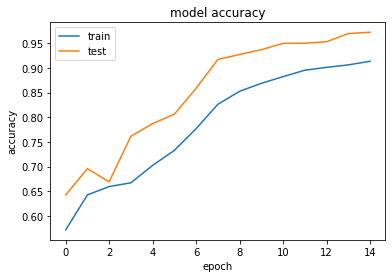

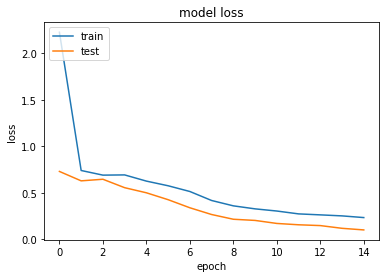

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
## revaluation

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([[9.2837604e-07, 9.6693853e-05, 9.9978608e-01, 1.1638228e-04],
       [8.3127957e-34, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [4.5545758e-03, 8.4549867e-02, 9.0727085e-01, 3.6247023e-03],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [9.9875116e-01, 1.2487693e-03, 0.0000000e+00, 1.0266131e-24],
       [1.5712179e-03, 7.9853041e-03, 9.8956364e-01, 8.7991828e-04]],
      dtype=float32)

In [ ]:
y_classes = y_pred.argmax(axis=-1)
y_classes

array([2, 3, 2, ..., 3, 0, 2])

In [ ]:
y_classes1 = keras.utils.to_categorical(y_classes, num_classes)
y_classes1

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_classes1)
accuracy

0.9720542791884993

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.argmax(axis=-1), y_classes1.argmax(axis=-1))

array([[3868,   87,   42,    0],
       [ 133, 4081,   45,    0],
       [  50,   54, 3251,    0],
       [   1,    3,    1, 3270]])

In [ ]:
##   save the model  ###

##model.save("/content/drive/My Drive/Radar data/data-nov/data/model2.h5")
